In [1]:
import sqlite3 as sql
import pandas as pd

conn = sql.connect("data.db", timeout=10)

df = pd.read_sql("select * from sensor_data", con = conn, index_col="id", parse_dates="timestamp")
display(df.info())
df.to_csv("sensor_data_export.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 1 to 2164
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   co2_ppm                  2164 non-null   float64       
 1   tvoc_ppm                 2164 non-null   float64       
 2   bmp280_temperature       2164 non-null   float64       
 3   bmp280_pressure          2164 non-null   float64       
 4   mlx_object_temperature   2164 non-null   float64       
 5   mlx_ambient_temperature  2164 non-null   float64       
 6   humidity_dht             2164 non-null   float64       
 7   temperature_dht          2164 non-null   float64       
 8   pir_uptime               2164 non-null   float64       
 9   timestamp                2164 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 186.0 KB


None

In [2]:
import numpy as np
df = pd.read_csv("labeled.csv", sep=";",index_col= "id", parse_dates=["timestamp"])
df['day'] = df['timestamp'].dt.day % 20
labels = ["door_closed", "ventilation_on", "human_count"]
defective_columns = ["bmp280_temperature", "bmp280_pressure"]
df[defective_columns] = df[defective_columns].replace({0 : np.nan})
display(df[defective_columns].isna().sum())
cols = labels + defective_columns
df.dropna(inplace=True)
filled = df[df["day"] == 1][cols].groupby(labels, group_keys=False)[defective_columns].apply(lambda x: x.fillna(x.median()))
df.loc[filled.index, defective_columns] = filled

#Combining ventilation and open door to a single ventilation variable
df["door_closed"] = df["door_closed"].astype(bool)
df["ventilation_on"] = df["ventilation_on"].astype(bool)
df["ventilation"] = (~df["door_closed"] | df["ventilation_on"])
df.drop(["ventilation_on", "door_closed"], inplace=True, axis=1)
df["ventilation"] = df["ventilation"].astype(int)
display(df.head(5))
display(df["ventilation"].value_counts())


bmp280_temperature    514
bmp280_pressure       514
dtype: int64

,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,timestamp,human_count,day,ventilation
id,,,,,,,,,,,,,
1,400.0,0.0,25.33,100549.44,22.75,24.41,31.0,22.4,8.29,2025-08-20 10:15:28,1,0,0
2,400.0,0.0,25.35,100550.63,22.31,24.37,31.0,22.9,9.75,2025-08-20 10:15:37,1,0,0
3,427.0,4.0,25.36,100550.11,22.41,24.37,31.0,22.9,5.56,2025-08-20 10:15:47,1,0,0
4,423.0,3.0,25.34,100549.78,22.41,24.35,31.0,22.9,0.00,2025-08-20 10:15:57,1,0,0
5,416.0,2.0,25.30,100552.23,22.29,24.31,31.0,22.9,0.00,2025-08-20 10:16:07,1,0,0


ventilation
1    1148
0     502
Name: count, dtype: int64

Total length: 1650


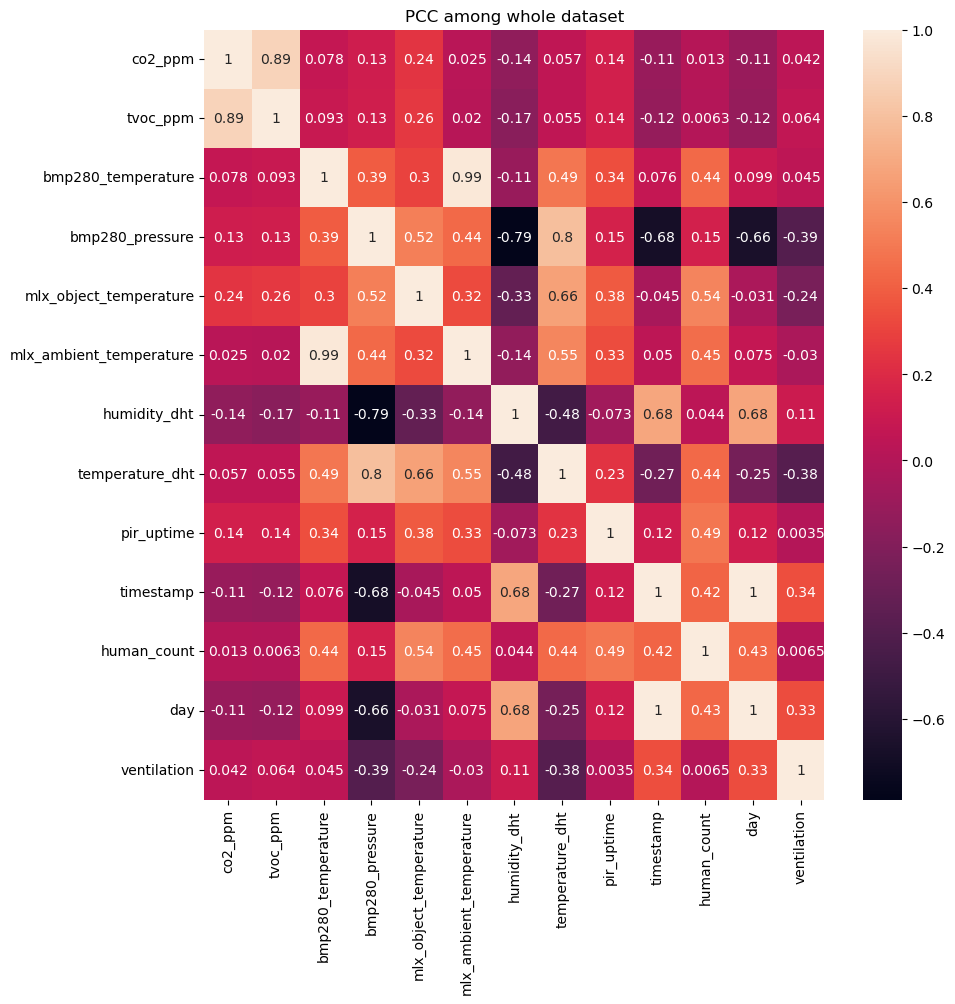

Humans: 3 PIR: 0.9571428571428572
Extreme co2 level: day 1 939.6499999999997


Index([129, 131, 165, 166, 173, 174, 197, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 479],
      dtype='int64', name='id')

Frame size: 552 Day:  0


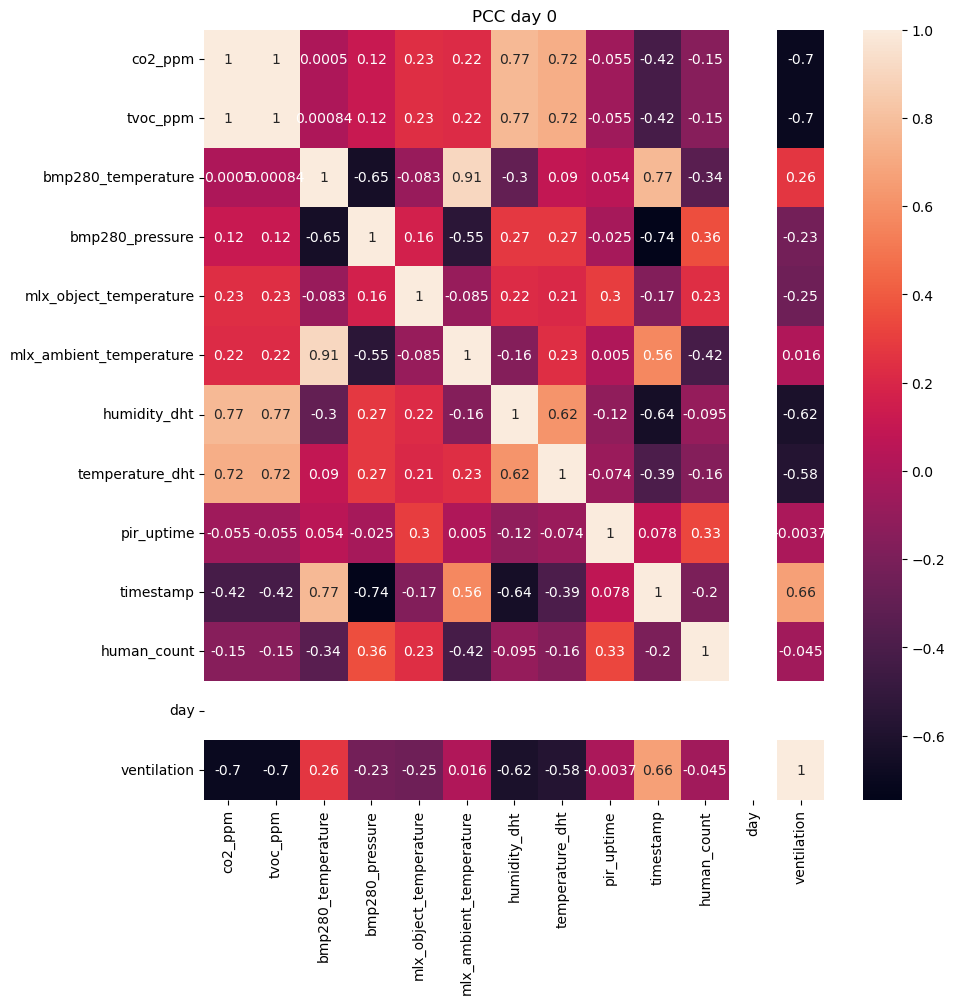

Quantiles: 


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count
0.05,400.0,0.00,25.1500,100534.6865,22.29,24.19,29.0,22.355,0.000000,0.0
0.95,885.9,73.45,26.3945,100557.1600,23.03,25.23,36.0,23.300,0.902095,1.0


Frame size: 461 Day:  1


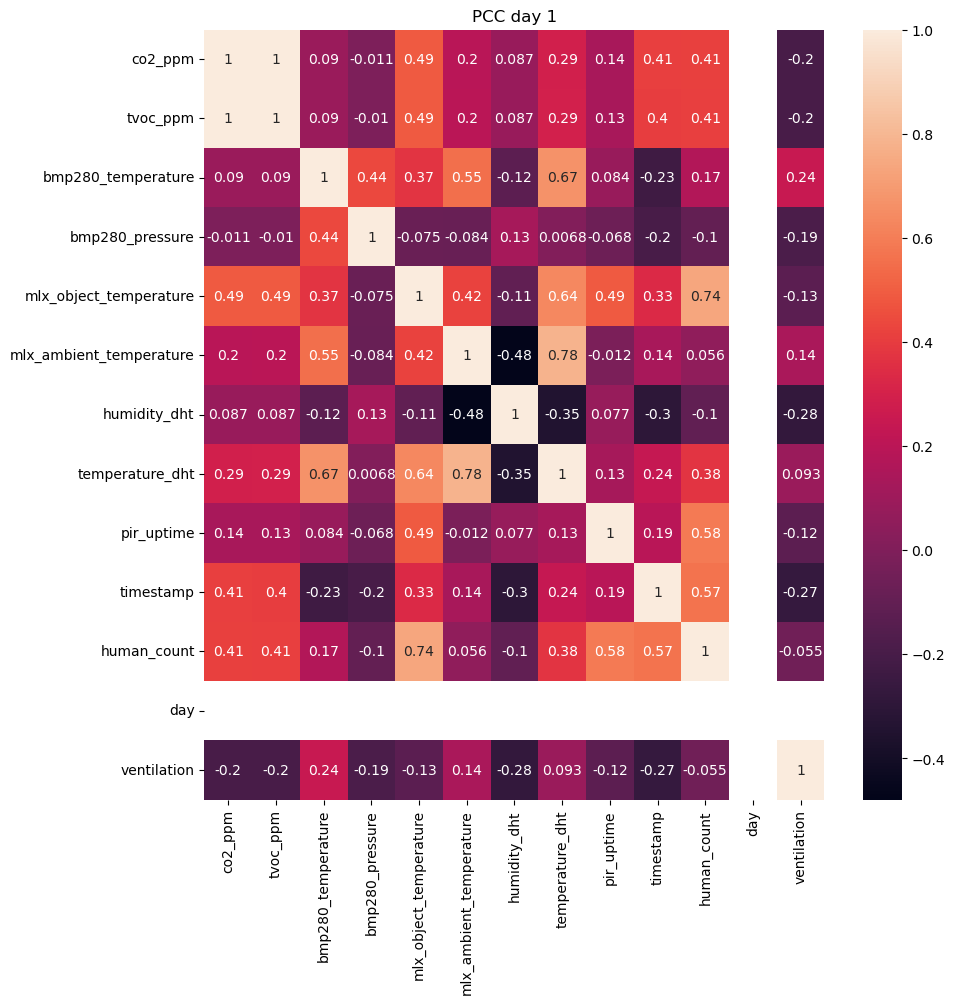

Quantiles: 


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count
0.05,406.0,0.0,23.99,100228.30,21.49,22.61,37.0,21.4,0.00000,0.0
0.95,529.0,19.0,24.38,100243.87,22.17,23.19,39.0,22.1,0.78381,1.0


Frame size: 410 Day:  2


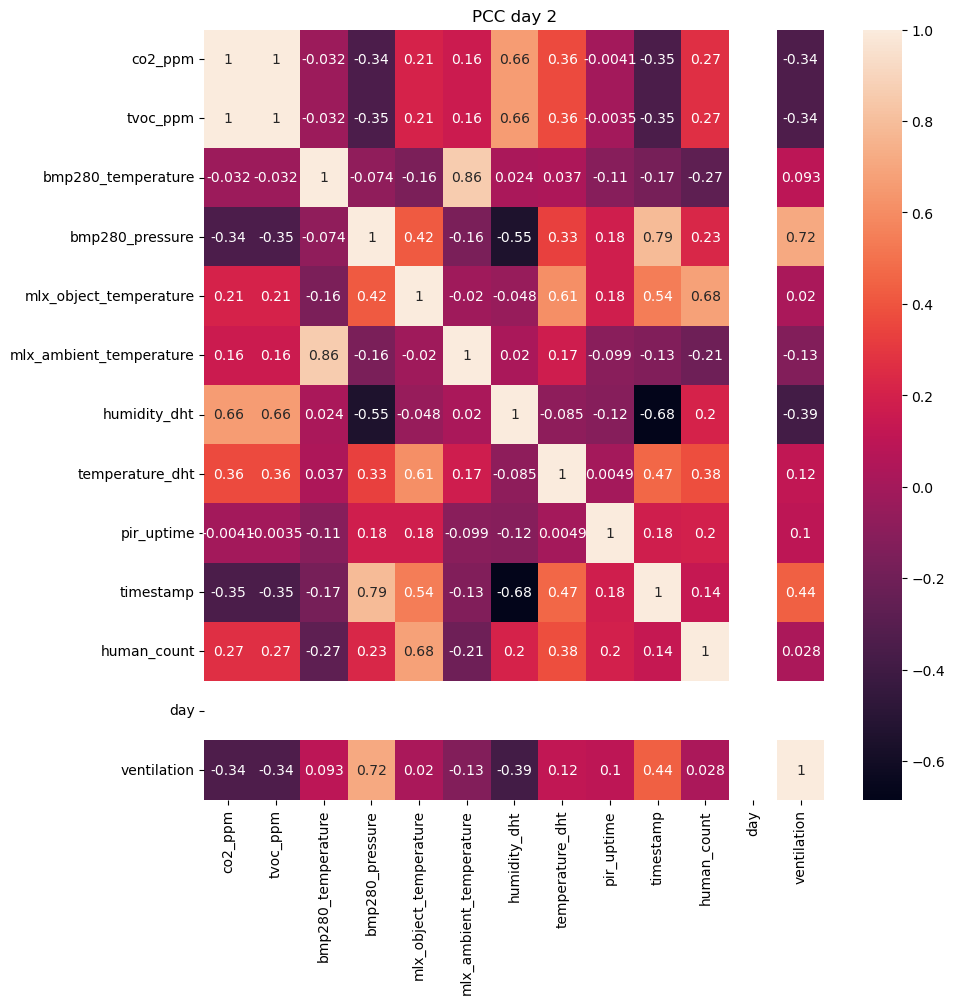

Quantiles: 


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count
0.05,405.45,0.0,24.77,100337.0845,22.29,23.55,35.0,22.1,0.000000,1.0
0.95,865.00,70.0,25.52,100362.4840,23.39,24.31,38.0,23.1,0.917762,2.0


Frame size: 65 Day:  2


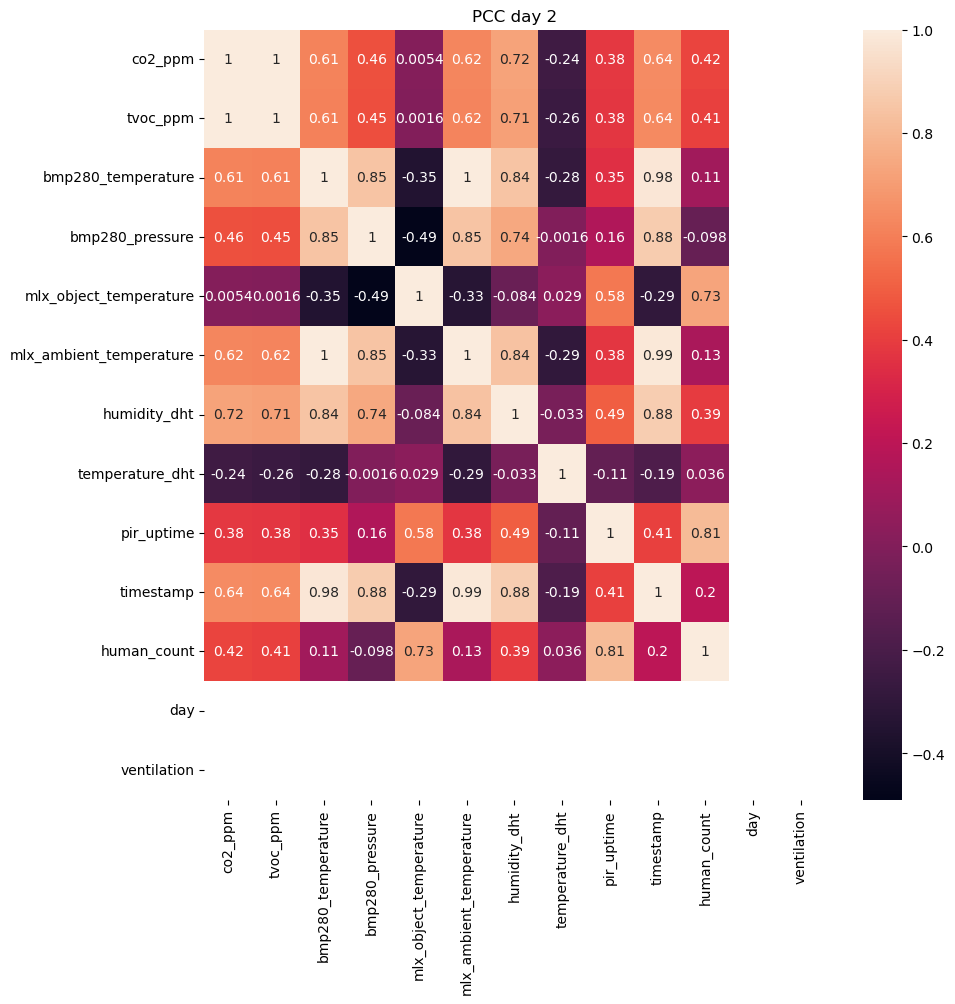

Quantiles: 


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count
0.05,400.0,0.0,26.552,100311.694,21.678,25.146,37.0,22.2,0.000000,0.0
0.95,484.6,12.0,28.718,100344.402,22.622,27.570,40.0,22.7,0.955238,3.0


Frame size: 121 Day:  2


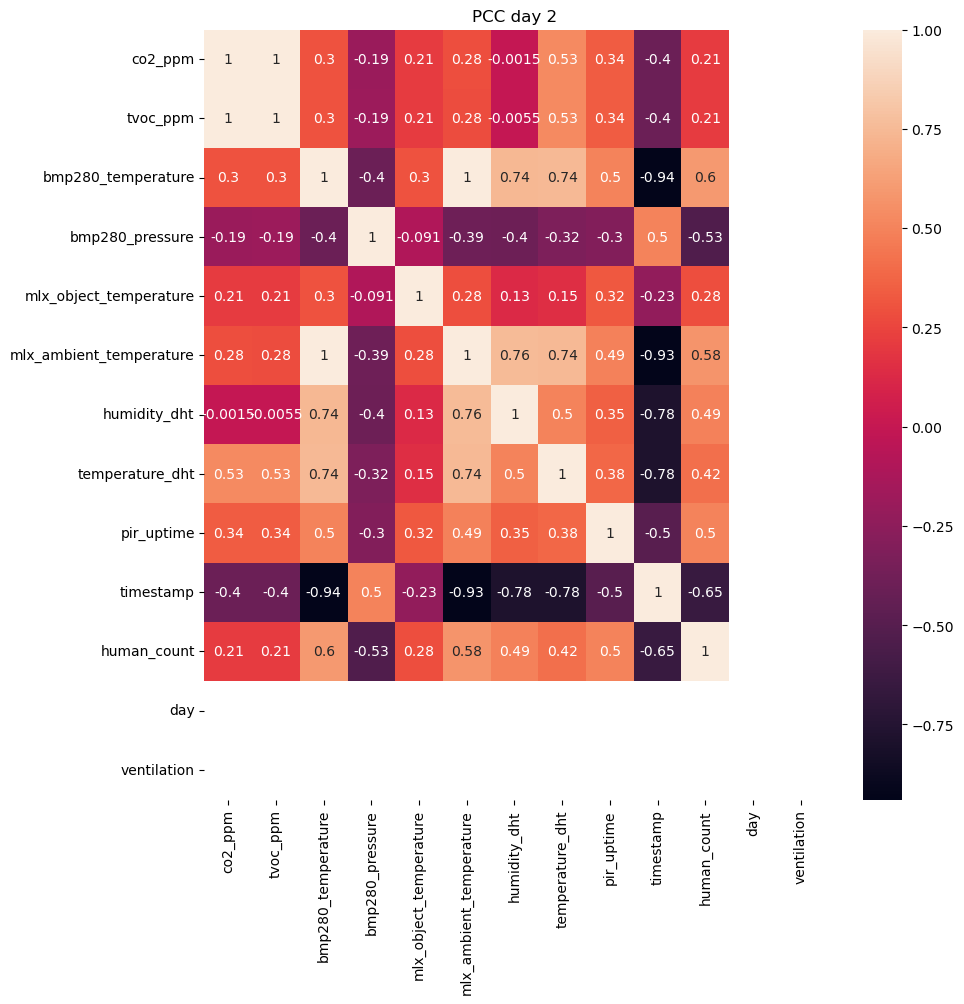

Quantiles: 


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count
0.05,542.0,21.0,26.05,100331.50,22.11,24.85,37.0,22.1,0.000000,1.0
0.95,895.0,75.0,29.58,100349.44,22.69,28.13,39.0,23.0,0.882857,2.0


Total amount of rows 1609


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
#401 - 417 sensor fall down.
#1631 - 1633 SENOR FALL
#1755 REBOOT
print("Total length:", len(df))

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.title("PCC among whole dataset")
plt.show()

#scale pir_uptimepir uptime max will be 10.5)
MAX_HUMANS = 4
MAX_PIR_UPTIME = 10.5
#df["human_count"] = df["human_count"] / MAX_HUMANS
df["pir_uptime"] = df["pir_uptime"] / MAX_PIR_UPTIME
print("Humans:", df["human_count"].max(),"PIR:", df["pir_uptime"].max())
dfs = []
for i in range (0, 3):
    dfs.append(df.loc[df["day"] == i,:].copy())
dfs[0] = dfs[0].drop(index = [i for i in range(401, 419)], axis = 0)
day_3 = dfs[2]
dfs[2] = [day_3.loc[:1754], day_3.loc[1755:]]
dfs[2][0] = [dfs[2][0].loc[:1628], dfs[2][0].loc[1629:]]
dfs[2][0][1].drop(index = [i for i in range(1629, 1634)], inplace=True, axis = 0)
def expand_lists(lists: list):
    for i in range(len(lists)):
        if isinstance(lists[i], list):
            nested = expand_lists(lists[i])
            lists.pop(i)
            lists.extend(nested)
    return lists
expand_lists(dfs)

numeric_cols = df.columns[~df.columns.isin(["ventilation", "timestamp", "day"])]

extreme_co2 = dfs[0]["co2_ppm"].quantile(0.97) # on the first day there were couple of extreme co2 readings due to me breathing into the sensor, so we can drop them
print("Extreme co2 level: day 1", extreme_co2)
display(dfs[0].loc[dfs[0]["co2_ppm"] > extreme_co2].index)
dfs[0].drop(index = dfs[0].loc[dfs[0]["co2_ppm"] > extreme_co2].index, axis = 0, inplace = True)

total_size = 0
for i in range(len(dfs)):
    dfs[i].reset_index(drop=True, inplace=True)
    day = dfs[i]["day"][0]
    size = len(dfs[i])
    print("Frame size:",size, "Day: ", day)
    total_size += size
    plt.figure(figsize=(10, 10))
    sns.heatmap(dfs[i].corr(), annot=True)
    plt.title(f"PCC day {day}")
    plt.show()
    quantiles = dfs[i][numeric_cols].quantile([0.05, 0.95], numeric_only = True)
    dfs[i] = dfs[i].drop(["timestamp", "day"], axis= 1)
    print("Quantiles: ")
    display(quantiles)
print("Total amount of rows", total_size)


In [4]:
for frame in dfs:
    display(frame.head(3))


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count,ventilation
0,400.0,0.0,25.33,100549.44,22.75,24.41,31.0,22.4,0.789524,1,0
1,400.0,0.0,25.35,100550.63,22.31,24.37,31.0,22.9,0.928571,1,0
2,427.0,4.0,25.36,100550.11,22.41,24.37,31.0,22.9,0.529524,1,0


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count,ventilation
0,407.0,1.0,24.49,100241.34,22.25,23.21,39.0,22.2,0.561905,1,1
1,418.0,2.0,24.48,100241.02,22.19,23.23,39.0,22.3,0.132381,1,1
2,421.0,3.0,24.47,100242.14,22.19,23.21,39.0,22.3,0.479048,1,1


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count,ventilation
0,400.0,0.0,25.89,100336.12,22.23,24.59,37.0,22.2,0.660000,0,1
1,415.0,2.0,25.87,100338.34,22.05,24.59,37.0,22.2,0.510476,0,1
2,415.0,2.0,25.88,100337.78,22.07,24.57,37.0,22.2,0.053333,0,1


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count,ventilation
0,414.0,2.0,26.31,100313.95,23.05,24.93,37.0,22.8,0.814286,3,1
1,417.0,2.0,26.41,100310.06,23.03,25.05,37.0,22.3,0.854286,3,1
2,407.0,1.0,26.44,100309.48,22.63,25.09,37.0,22.4,0.892381,3,1


,co2_ppm,tvoc_ppm,bmp280_temperature,bmp280_pressure,mlx_object_temperature,mlx_ambient_temperature,humidity_dht,temperature_dht,pir_uptime,human_count,ventilation
0,975.0,87.0,28.38,100335.94,22.59,27.29,41.0,22.9,0.836190,2,1
1,902.0,76.0,28.41,100333.08,22.19,27.29,40.0,22.7,0.107619,2,1
2,959.0,85.0,28.49,100335.95,22.11,27.31,39.0,22.8,0.545714,2,1


In [5]:
Y_cols = ["human_count", "ventilation"] #humancount
X_cols = dfs[0].columns[~dfs[0].columns.isin(Y_cols)]
global_reference_states = [dframe.iloc[0][X_cols[:-1]].to_numpy() for dframe in dfs]
print(global_reference_states)

def compute_global_deltas(frames: list):
    print(X_cols[-1])
    global_max_deltas = np.zeros(len(X_cols) - 1) #last index is PIR uptime we don't touch that
    global_min_deltas = np.zeros(len(X_cols) - 1)
    for i in range(len(frames)):
        frames[i][X_cols[:-1]] = frames[i][X_cols[:-1]] - global_reference_states[i]
        global_max_deltas = np.maximum(global_max_deltas, frames[i][X_cols[:-1]].max().to_numpy())
        global_min_deltas = np.minimum(global_min_deltas, frames[i][X_cols[:-1]].min().to_numpy())
    diff_max_min = global_max_deltas - global_min_deltas
    print("Globally maximum positive observed deltas ", global_max_deltas)
    print("Globally minumum negative observed deltas", global_min_deltas)
    for frame in frames:
        frame[X_cols[:-1]] = (frame[X_cols[:-1]] -  global_min_deltas)/diff_max_min
    
compute_global_deltas(dfs)
#for dframe in dfs:
#    display(dframe.head(3))

#mapping X[i] -> Y[i-1] (right shift Y)
def create_sequences_from_frames(frames: list[pd.DataFrame],  X_cols, Y_cols, window_size = 18):
    X_sequences = []
    shifted_Y_sequences = []
    Y_targets = []
    for frame in frames:
        frame_relative_X_sequences = np.zeros((len(frame) - window_size, window_size, len(X_cols)))
        frame_relative_Y_seqeunces = np.zeros((len(frame) - window_size, window_size, len(Y_cols)))

       # frame_relative_Y_targets = np.zeros((len(frame) - window_size, window_size, len(Y_cols)))

        for i in range(1, len(frame) - window_size + 1):
            frame_relative_X_sequences[i-1] = frame[X_cols][i:i + window_size].to_numpy()
            frame_relative_Y_seqeunces[i-1] = frame[Y_cols][i - 1:i + window_size - 1].to_numpy()

            #frame_relative_Y_targets[i-1] = frame[Y_cols][i:i + window_size].to_numpy()

        X_sequences.append(frame_relative_X_sequences)
        shifted_Y_sequences.append(frame_relative_Y_seqeunces)
        #Y_targets.append(frame_relative_Y_targets)
        Y_targets.append(frame[Y_cols][window_size:].to_numpy())
    return X_sequences, shifted_Y_sequences, Y_targets
window_size = 24
X_sequences, shifted_Y_sequences, Y_targets = create_sequences_from_frames(dfs, X_cols, Y_cols, window_size=window_size)

[array([4.0000000e+02, 0.0000000e+00, 2.5330000e+01, 1.0054944e+05,
       2.2750000e+01, 2.4410000e+01, 3.1000000e+01, 2.2400000e+01]), array([4.0700000e+02, 1.0000000e+00, 2.4490000e+01, 1.0024134e+05,
       2.2250000e+01, 2.3210000e+01, 3.9000000e+01, 2.2200000e+01]), array([4.0000000e+02, 0.0000000e+00, 2.5890000e+01, 1.0033612e+05,
       2.2230000e+01, 2.4590000e+01, 3.7000000e+01, 2.2200000e+01]), array([4.1400000e+02, 2.0000000e+00, 2.6310000e+01, 1.0031395e+05,
       2.3050000e+01, 2.4930000e+01, 3.7000000e+01, 2.2800000e+01]), array([9.7500000e+02, 8.7000000e+01, 2.8380000e+01, 1.0033594e+05,
       2.2590000e+01, 2.7290000e+01, 4.1000000e+01, 2.2900000e+01])]
pir_uptime
Globally maximum positive observed deltas  [788.   120.     2.49  33.     5.1    2.66   6.     1.1 ]
Globally minumum negative observed deltas [-439.    -67.     -2.43  -21.28   -1.42   -2.64   -4.     -0.9 ]


In [6]:
X_delta_cols = X_cols[X_cols != "pir_uptime"].to_list()
def compute_deltas(frame_sequences: list):
    global_max_deltas = np.zeros(len(X_cols) - 1) #last index is PIR uptime we don't touch that
    global_min_deltas = np.zeros(len(X_cols) - 1)
    for sequence_arr in frame_sequences:
        for i in range(len(sequence_arr)):
            sequence_arr[i][:, 0:-1] = sequence_arr[i][:, 0:-1] - sequence_arr[i][0, :-1]
            max_observed_deltas = sequence_arr[i][:,:-1].max(axis = 0)
            min_observed_deltas = sequence_arr[i][:,:-1].min(axis = 0)
            global_max_deltas = np.maximum(global_max_deltas, max_observed_deltas)
            global_min_deltas = np.minimum(global_min_deltas, min_observed_deltas)
    np.set_printoptions(suppress=True)
    print("Globally maximum positive observed deltas ", global_max_deltas)
    print("Globally minumum negative observed deltas", global_min_deltas)
    #now we need to scale our sequences based on maximum and minumum observed deltas
    diff_max_min = global_max_deltas - global_min_deltas
    for sequence_arr in frame_sequences:
        for i in range(len(sequence_arr)):
            sequence_arr[i][:, 0:-1] = (sequence_arr[i][:, 0:-1] - global_min_deltas) / diff_max_min

#compute_deltas(X_sequences)

(528, 24, 8)
(437, 24, 8)
(386, 24, 8)
(41, 24, 8)
(97, 24, 8)
------------
(528, 24, 2)
(437, 24, 2)
(386, 24, 2)
(41, 24, 2)
(97, 24, 2)
------------
(528, 2)
(437, 2)
(386, 2)
(41, 2)
(97, 2)
Sensor shape: (24, 9)
Shfted Y shape (24, 2)
(1, 24, 4)
(1, 24, 1)
(1, 24, 9)


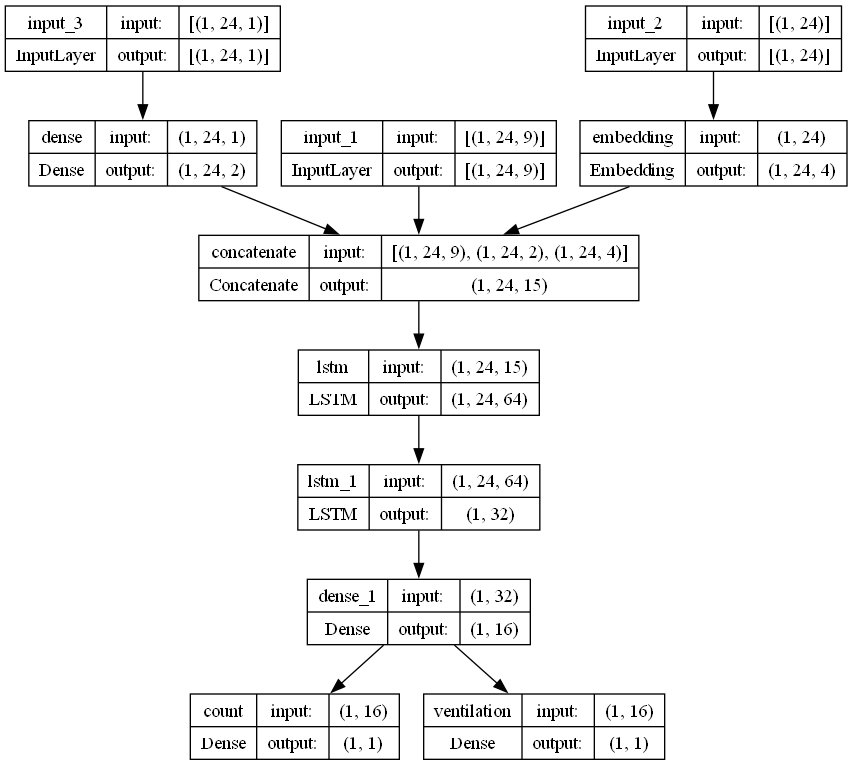

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(1, 24, 1)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(1, 24)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(1, 24, 9)]         0           []                               
                                                                                                  
 dense (Dense)                  (1, 24, 2)           4           ['input_3[0][0]']                
                                                                                              

None

In [7]:
import tensorflow as tf

for sequence in X_sequences:
    #testing with dropped PIR
    sequence = sequence[..., :-1]
    print(sequence.shape)
print("------------")
for sequence in shifted_Y_sequences:
    print(sequence.shape)
print("------------")
for targets in Y_targets:
    print(targets.shape)

'''
for i in range(len(X_sequences)):
    human_counts = shifted_Y_sequences[i][:, :, 0]
    shifted_Y_sequences[i] = np.delete(shifted_Y_sequences[i], 0, axis=-1)
    X_sequences[i] = np.c_[X_sequences[i], np.expand_dims(human_counts, axis=-1)]
'''
#testing with dropped PIR
sensor_shape = X_sequences[0].shape[1:]
shifted_Y_shape = shifted_Y_sequences[0].shape[1:]

print("Sensor shape:", sensor_shape)
print("Shfted Y shape", shifted_Y_shape)
#we will have two input layers one for shifted predictions, and one for sensors


def build_model():
    sensor_input = tf.keras.layers.Input(shape=sensor_shape, batch_size=1, dtype="float32")
    shifted_vent = tf.keras.layers.Input(shape=shifted_Y_shape[0], batch_size=1, dtype="int32")
    shifted_human_counts = tf.keras.layers.Input(shape=(shifted_Y_shape[0], 1), batch_size=1, dtype="float32")
    human_count_dense = tf.keras.layers.Dense(2, activation="relu")(shifted_human_counts)
    embed_vent = tf.keras.layers.Embedding(2, 4)(shifted_vent)
    print(embed_vent.shape)
    print(shifted_human_counts.shape)
    print(sensor_input.shape)
    concat = tf.keras.layers.Concatenate(axis = 2)([sensor_input,  human_count_dense, embed_vent])
    lstm = tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.2)(concat)
    lstm_2 = tf.keras.layers.LSTM(32,  dropout=0.1)(lstm) #return_sequences=True)
    dense = tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01))(lstm_2)
    output_human_count = tf.keras.layers.Dense(1, activation="relu", name="count")(dense)
    output_ventilation = tf.keras.layers.Dense(1, activation="sigmoid", name="ventilation")(dense)
    model = tf.keras.models.Model(inputs = [sensor_input, shifted_human_counts, shifted_vent], outputs = [output_human_count, output_ventilation])
    return model

model = build_model()
display(tf.keras.utils.plot_model(model, show_shapes=True))
display(model.summary())

In [8]:
def concatenate_all(X_sequences, Y_shifted_sequences, Y_targets):
    X_concatted = X_sequences[0].copy()
    Y_shifted_concatted =  Y_shifted_sequences[0].copy()
    targets_concatted = Y_targets[0].copy()
    for i in range(1, len(X_sequences)):
        X_concatted = np.concatenate([X_concatted, X_sequences[i]], axis = 0)
        Y_shifted_concatted = np.concatenate([Y_shifted_concatted, Y_shifted_sequences[i]], axis = 0 )
        targets_concatted = np.concatenate([targets_concatted,  Y_targets[i]], axis = 0 )
    return X_concatted, Y_shifted_concatted, targets_concatted

X_concatted, Y_shifted_concatted, targets_concatted = concatenate_all(X_sequences, shifted_Y_sequences, Y_targets)

X_concatted = X_concatted.astype("float32")
shifted_human_count = Y_shifted_concatted[..., 0][..., np.newaxis].astype("float32")
shifted_vent = Y_shifted_concatted[..., 1].astype("int32")
targets_count = targets_concatted[..., 0].astype("float32")
targets_ventilation = targets_concatted[..., 1].astype("float32")
print(Y_shifted_concatted.shape)
print(shifted_human_count.shape)
print(shifted_vent.shape)
print(np.max(X_concatted[:,:,-1]),X_concatted.shape)
print(np.max(targets_count), targets_count.shape)
print(np.max(targets_ventilation), targets_ventilation.shape)

dataset = tf.data.Dataset.from_tensor_slices(((X_concatted, shifted_human_count, shifted_vent), (targets_count, targets_ventilation))).batch(1)
validation = dataset.skip(1850).prefetch(tf.data.AUTOTUNE)
training = dataset.take(1850).prefetch(tf.data.AUTOTUNE)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss={"count": tf.keras.losses.mean_squared_error, "ventilation": tf.keras.losses.binary_crossentropy}, 
              metrics={"count": tf.keras.metrics.mae, "ventilation":tf.keras.metrics.binary_accuracy},
              loss_weights={"count": 2.0, "ventilation": 1.0})

#history = model.fit(dataset, validation_data=validation, epochs = 60, verbose=1)
history = model.fit(dataset.prefetch(tf.data.AUTOTUNE), epochs = 60, verbose=1)
model.save("model.h5")

(1489, 24, 2)
(1489, 24, 1)
(1489, 24)
0.9552381 (1489, 24, 9)
2.0 (1489,)
1.0 (1489,)
Epoch 1/60
1489/1489 [==============================] - 30s 17ms/step - loss: 3.0348 - count_loss: 1.2995 - ventilation_loss: 0.3384 - count_mean_absolute_error: 0.8491 - ventilation_binary_accuracy: 0.8711
Epoch 2/60
1489/1489 [==============================] - 26s 17ms/step - loss: 3.1368 - count_loss: 1.3157 - ventilation_loss: 0.4705 - count_mean_absolute_error: 0.8630 - ventilation_binary_accuracy: 0.8012
Epoch 3/60
1489/1489 [==============================] - 25s 17ms/step - loss: 1.1627 - count_loss: 0.4063 - ventilation_loss: 0.3250 - count_mean_absolute_error: 0.4435 - ventilation_binary_accuracy: 0.8724
Epoch 4/60
1489/1489 [==============================] - 25s 17ms/step - loss: 0.5427 - count_loss: 0.1921 - ventilation_loss: 0.1274 - count_mean_absolute_error: 0.2875 - ventilation_binary_accuracy: 0.9678
Epoch 5/60
1489/1489 [==============================] - 25s 17ms/step - loss: 0.4507 

In [9]:
model.save("model.h5")
for i, inp in enumerate(model.inputs):
    print(i, inp.name, inp.shape)

0 input_1 (1, 24, 9)
1 input_3 (1, 24, 1)
2 input_2 (1, 24)


In [10]:
print(tf.__version__)
#model = tf.keras.models.load_model("model.h5")
#$ xxd -i model_quant.tflite > model_data.cc
def representative_data_gen():
    for input_batch, _ in dataset:
        X, human_count, vent = input_batch
        yield [X, human_count, vent] #vent is int32 so it shows a user warning about statistics
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32
tflite_model = converter.convert()
with open("model_quant.tflite", "wb") as file:
    file.write(tflite_model)
tf.lite.experimental.Analyzer.analyze(model_content=tflite_model)

2.10.0


INFO:tensorflow:Assets written to: C:\Users\Leonid\AppData\Local\Temp\tmp3zuajbqt\assets


INFO:tensorflow:Assets written to: C:\Users\Leonid\AppData\Local\Temp\tmp3zuajbqt\assets
c:\Users\Leonid\anaconda3\envs\dlearn_env\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the QUANTIZE op takes
tensor #0 as input and produces tensor #6 as output.

Subgraph#0 main(T#0, T#1, T#2) -> [T#65, T#62]
  Op#0 QUANTIZE(T#0) -> [T#6]
  Op#1 QUANTIZE(T#1) -> [T#39]
  Op#2 FULLY_CONNECTED(T#39, T#7[], T#8[-2748, -1552]) -> [T#40]
  Op#3 GATHER(T#13[], T#2) -> [T#41]
  Op#4 CONCATENATION(T#6, T#40, T#41) -> [T#42]
  Op#5 UNIDIRECTIONAL_SEQUENCE_LSTM(T#42, T#38[], T#37[], T#36[], T#35[], T#34[], T#33[], T#32[], T#31[], T#-1, T#-1, T#-1, T#9[86, 276, 128, -304, -180, ...], T#10[2076, 1806, 1603, 1509, 1620, ...], T#11[74, 301, -492, 47, -32, ...], T#12[-498, -252, 151, -141, -243, ...], T#-1, T#-1, T#43, T#44, T#-1, T#-1, T#-1, T#-1) -> [T#50]
  Op#6 UNIDIRECTIONAL_SEQUENCE_LSTM(T#50, T#30[], T#29[], T#28[], T#27[], T#26[], T#25[], T#24[], T#23[], T#-1, T#-1, T#-1, T#22[1925, -1797, 1590, -655, -546, ...], 